## Observations and Insights 


In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)


mouse_metadata.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16


In [2]:
study_results.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0


In [3]:
# Combine the data into a single dataset
#study_results2 = study_results.drop_duplicates(subset=["Mouse ID","Timepoint"],keep='first',inplace=False, ignore_index=False)
# Display the data table for preview
Cleaned_data = pd.merge(study_results, mouse_metadata, how="left",on="Mouse ID")
Cleaned_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [4]:
Cleaned_data.count()

Mouse ID              1893
Timepoint             1893
Tumor Volume (mm3)    1893
Metastatic Sites      1893
Drug Regimen          1893
Sex                   1893
Age_months            1893
Weight (g)            1893
dtype: int64

In [5]:
# Checking the number of mice.
print (len(Cleaned_data ["Mouse ID"].unique()))

249


In [6]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mouse_id = Cleaned_data.loc[Cleaned_data.duplicated(subset=['Mouse ID', 'Timepoint']),'Mouse ID'].unique()

#study_results_mice = study_results [["Mouse ID","Timepoint"]]
#study_results_mice.groupby("Mouse ID").count()
duplicate_mouse_id

array(['g989'], dtype=object)

In [7]:
# Optional: Get all the data for the duplicate mouse ID. 
Duplicate_MouseData = Cleaned_data.loc[Cleaned_data['Mouse ID'] == 'g989']
Duplicate_MouseData

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [8]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
Complete_Cleaned_data = Cleaned_data[Cleaned_data['Mouse ID'].isin(duplicate_mouse_id) == False]
Complete_Cleaned_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [9]:
# Checking the number of mice in the clean DataFrame.
len(Complete_Cleaned_data['Mouse ID'].unique())

248

## Summary Statistics

In [10]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.

mean_values = round(Complete_Cleaned_data.groupby("Drug Regimen").mean()["Tumor Volume (mm3)"],2)
median_values = round(Complete_Cleaned_data.groupby("Drug Regimen").median()["Tumor Volume (mm3)"],2)
variance_values = round(Complete_Cleaned_data.groupby("Drug Regimen").var()["Tumor Volume (mm3)"],2)
standarddev_values = round(Complete_Cleaned_data.groupby("Drug Regimen").std()["Tumor Volume (mm3)"],2)
sem_values = round(Complete_Cleaned_data.groupby("Drug Regimen").sem()["Tumor Volume (mm3)"],2)
summary_df = pd.DataFrame ({"Mean Tumer Volume (mm3)": mean_values,
                            "Median Tumer Volume (mm3)": median_values,
                            "Variance Tumer Volume (mm3)": variance_values,
                            "Standard Deviation Tumer Volume (mm3)": standarddev_values,
                            "SEM Tumer Volume (mm3)": sem_values
                            })
summary_df

,Mean Tumer Volume (mm3),Median Tumer Volume (mm3),Variance Tumer Volume (mm3),Standard Deviation Tumer Volume (mm3),SEM Tumer Volume (mm3)
Drug Regimen,,,,,
Capomulin,40.68,41.56,24.95,4.99,0.33
Ceftamin,52.59,51.78,39.29,6.27,0.47
Infubinol,52.88,51.82,43.13,6.57,0.49
Ketapril,55.24,53.70,68.55,8.28,0.60
Naftisol,54.33,52.51,66.17,8.13,0.60
Placebo,54.03,52.29,61.17,7.82,0.58
Propriva,52.32,50.45,43.85,6.62,0.54
Ramicane,40.22,40.67,23.49,4.85,0.32
Stelasyn,54.23,52.43,59.45,7.71,0.57


In [11]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line
# df.groupby('A').agg({'B': ['min', 'max'], 'C': 'sum'})

summary_df_agg = Complete_Cleaned_data.groupby("Drug Regimen").agg({"Tumor Volume (mm3)":["mean","median","var","std","sem"]})
summary_df_agg

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

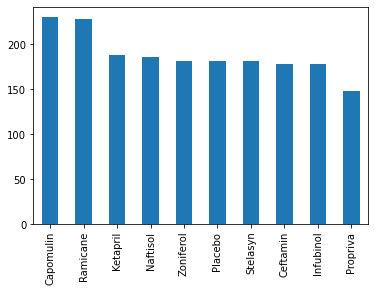

In [41]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pandas.
df_val_count=Complete_Cleaned_data["Drug Regimen"].value_counts()
#df_val_groupby=Complete_Cleaned_data.groupby(["Drug Regimen"]).count()["Mouse ID"]
df_val_count.plot(kind="bar")
#df_val_groupby.plot(kind="line", color="red")
plt.show()

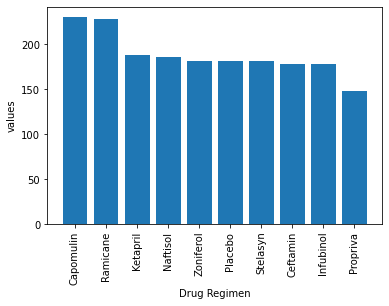

In [40]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pyplot.
plt.bar(df_val_count.index.values, df_val_count.values)
plt.xticks(rotation=90)
plt.xlabel('Drug Regimen')
plt.ylabel('values')
plt.show()

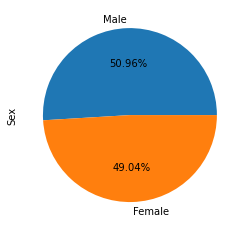

In [48]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

df_val_count_pie=Complete_Cleaned_data["Sex"].value_counts()
df_val_count_pie.plot(kind="pie",autopct='%1.2f%%')

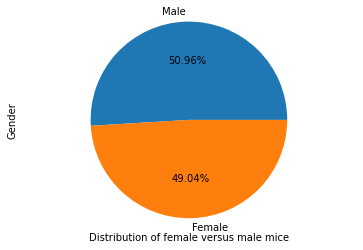

In [61]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

plt.ylabel("Gender")
plt.xlabel("Distribution of female versus male mice")
plt.pie(df_val_count_pie.values, labels=df_val_count_pie.index.values,autopct="%1.2f%%")
plt.axis("equal")
plt.show()

## Quartiles, Outliers and Boxplots

In [90]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

Capomulin_DF = Complete_Cleaned_data.loc[Complete_Cleaned_data["Drug Regimen"] == "Capomulin"]
Ramicane_DF = Complete_Cleaned_data.loc[Complete_Cleaned_data["Drug Regimen"] == "Ramicane"]
Infubinol_DF = Complete_Cleaned_data.loc[Complete_Cleaned_data["Drug Regimen"] == "Infubinol"]
Ceftamin_DF = Complete_Cleaned_data.loc[Complete_Cleaned_data["Drug Regimen"] == "Ceftamin"]

# Start by getting the last (greatest) timepoint for each mouse

Capomulin_DF_final_time = Capomulin_DF.groupby("Mouse ID").max ()["Timepoint"]
Ramicane_DF_final_time = Ramicane_DF.groupby("Mouse ID").max ()["Timepoint"]
Infubinol_DF_final_time = Infubinol_DF.groupby("Mouse ID").max ()["Timepoint"]
Ceftamin_DF_final_time = Ceftamin_DF.groupby("Mouse ID").max ()["Timepoint"]

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
DF_Merged_MaxTime_Capomulin = pd.merge (Capomulin_DF_final_time, Complete_Cleaned_data, on=["Mouse ID","Timepoint"], how="left")
DF_Merged_MaxTime_Ramicane = pd.merge (Ramicane_DF_final_time, Complete_Cleaned_data, on=["Mouse ID","Timepoint"], how="left")
DF_Merged_MaxTime_Infubinol = pd.merge (Infubinol_DF_final_time, Complete_Cleaned_data, on=["Mouse ID","Timepoint"], how="left")
DF_Merged_MaxTime_Ceftamin = pd.merge (Ceftamin_DF_final_time, Complete_Cleaned_data, on=["Mouse ID","Timepoint"], how="left")


DF_Merged_MaxTime = DF_Merged_MaxTime_Capomulin.append(DF_Merged_MaxTime_Ramicane)
DF_Merged_MaxTime = DF_Merged_MaxTime.append (DF_Merged_MaxTime_Infubinol)
DF_Merged_MaxTime = DF_Merged_MaxTime.append (DF_Merged_MaxTime_Ceftamin)
DF_Merged_MaxTime

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,45,38.982878,2,Capomulin,Female,9,22
1,b742,45,38.939633,0,Capomulin,Male,7,21
2,f966,20,30.485985,0,Capomulin,Male,16,17
3,g288,45,37.074024,1,Capomulin,Male,3,19
4,g316,45,40.159220,2,Capomulin,Female,22,22
5,i557,45,47.685963,1,Capomulin,Female,1,24
6,i738,45,37.311846,2,Capomulin,Female,23,20
7,j119,45,38.125164,1,Capomulin,Female,7,23
8,j246,35,38.753265,1,Capomulin,Female,21,21
9,l509,45,41.483008,3,Capomulin,Male,17,21


In [190]:
# Put treatments into a list for for loop (and later for plot labels)
Treatments = list(DF_Merged_MaxTime["Drug Regimen"].unique())
print (Treatments)

# Create empty list to fill with tumor vol data (for plotting)
Tumor_vol_data = []

for Treatment in Treatments:
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
    #print (Treatment)
    
    print ("------------------------------------------------")
    print (f"Treatment Name: {Treatment}")
    print ("------------------------------------------------")    

    # add subset     

    Tumor_Volume = DF_Merged_MaxTime.loc[DF_Merged_MaxTime["Drug Regimen"] == Treatment,"Tumor Volume (mm3)"]
    Tumor_vol_data.append (Tumor_Volume)

    # Determine outliers using upper and lower bounds
    quartiles = Tumor_Volume.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq

    print(f"The lower quartile of occupancy is: {lowerq}")
    print(f"The upper quartile of occupancy is: {upperq}")
    print(f"The interquartile range of occupancy is: {iqr}")
    print(f"The the median of occupancy is: {quartiles[0.5]} ")
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    print(f"Values below {lower_bound} could be outliers.")
    print(f"Values above {upper_bound} could be outliers.")

    print ("\n")
    outlier_occupancy = DF_Merged_MaxTime.loc[((DF_Merged_MaxTime['Tumor Volume (mm3)'] < lower_bound) | (DF_Merged_MaxTime['Tumor Volume (mm3)'] > upper_bound)) & (DF_Merged_MaxTime["Drug Regimen"] == Treatment)]
    print (f"The outliers for {Treatment}:")
    print (outlier_occupancy)
    print ("\n")


['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
------------------------------------------------
Treatment Name: Capomulin
------------------------------------------------
The lower quartile of occupancy is: 32.37735684
The upper quartile of occupancy is: 40.1592203
The interquartile range of occupancy is: 7.781863460000004
The the median of occupancy is: 38.125164399999996 
Values below 20.70456164999999 could be outliers.
Values above 51.83201549 could be outliers.


The outliers for Capomulin:
Empty DataFrame
Columns: [Mouse ID, Timepoint, Tumor Volume (mm3), Metastatic Sites, Drug Regimen, Sex, Age_months, Weight (g)]
Index: []


------------------------------------------------
Treatment Name: Ramicane
------------------------------------------------
The lower quartile of occupancy is: 31.56046955
The upper quartile of occupancy is: 40.65900627
The interquartile range of occupancy is: 9.098536719999998
The the median of occupancy is: 36.56165229 
Values below 17.912664470000003 

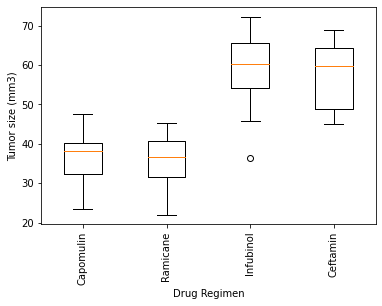

In [196]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
fig1, ax1 = plt.subplots ()
ax1.boxplot (Tumor_vol_data, labels=Treatments)
plt.xlabel("Drug Regimen")
plt.ylabel("Tumor size (mm3)")
plt.xticks(rotation=90)
plt.show()

## Line and Scatter Plots

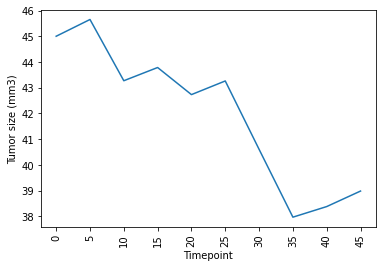

In [220]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
Capomulin_DF_selected_b128_y = Capomulin_DF.loc[Capomulin_DF["Mouse ID"] == "b128","Tumor Volume (mm3)"]
Capomulin_DF_selected_b128_x = Capomulin_DF.loc[Capomulin_DF["Mouse ID"] == "b128","Timepoint"]

plt.plot(Capomulin_DF_selected_b128_x,Capomulin_DF_selected_b128_y)
plt.xticks(Capomulin_DF_selected_b128_x, rotation=90)
plt.xlabel('Timepoint')
plt.ylabel('Tumor size (mm3)')
plt.show()

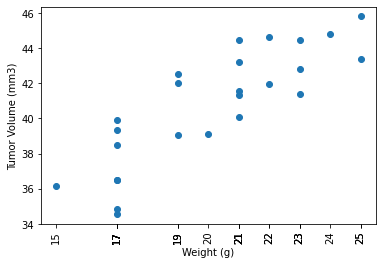

In [225]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen

Capomulin_DF_avg_y = Capomulin_DF.groupby("Mouse ID").mean ()["Tumor Volume (mm3)"]
Capomulin_DF_avg_x = Capomulin_DF.groupby("Mouse ID").mean () ["Weight (g)"]

plt.scatter(Capomulin_DF_avg_x,Capomulin_DF_avg_y)
plt.xticks(Capomulin_DF_avg_x, rotation=90)
plt.xlabel('Weight (g)')
plt.ylabel('Tumor Volume (mm3)')
plt.show()

## Correlation and Regression

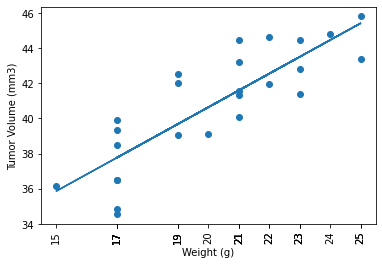

correlation coefficient is: 0.8419363424694718


In [237]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
slope, intercept, rvalue, pvalue, std_error = st.linregress(Capomulin_DF_avg_x,Capomulin_DF_avg_y)
Lin_fit = slope * Capomulin_DF_avg_x + intercept
plt.scatter(Capomulin_DF_avg_x,Capomulin_DF_avg_y)
plt.plot(Capomulin_DF_avg_x,Lin_fit,"-")
plt.xticks(Capomulin_DF_avg_x, rotation=90)
plt.xlabel('Weight (g)')
plt.ylabel('Tumor Volume (mm3)')
plt.show()

print (f"correlation coefficient is: {rvalue}")